In [2]:
# part1_simple_classification.py
# Simple classification: predict Pass (1) / Fail (0) from hours studied

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Features: [hours_studied]
X = np.array([[1], [2], [3], [4], [5], [6], [7], [8]])
# Labels: 0 = Fail, 1 = Pass
y = np.array([0, 0, 0, 0, 1, 1, 1, 1])

# 1. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# 2. Train classification model (Logistic Regression)
model = LogisticRegression()
model.fit(X_train, y_train)

# 3. Evaluate
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

# 4. Predict for a new student
new_hours = np.array([[3.5]])   # 3.5 hours of study
prob_pass = model.predict_proba(new_hours)[0][1]
prediction = model.predict(new_hours)[0]

print("Hours studied:", new_hours[0][0])
print("Probability of PASS:", prob_pass)
print("Predicted class (0=Fail,1=Pass):", prediction)


Accuracy: 1.0
Hours studied: 3.5
Probability of PASS: 0.23844318546676324
Predicted class (0=Fail,1=Pass): 0


In [3]:
# part2_logistic_iris.py
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

if __name__ == "__main__":
    # Step 1: Load Data
    iris = load_iris()
    X = iris.data          # features
    y = iris.target        # labels (0, 1, 2)

    # Step 2: Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Step 3: Train Model
    model = LogisticRegression(max_iter=200)
    model.fit(X_train, y_train)

    # Step 4: Evaluate
    accuracy = model.score(X_test, y_test)
    print("Test Accuracy:", accuracy)

    # Student Exercise 1: Print probabilities
    print("\nPredicted probabilities for first 5 test samples:")
    probs = model.predict_proba(X_test[:5])
    print(probs)

    # Student Exercise 2: Predict for a custom input
    custom_input = [[5.1, 3.5, 1.4, 0.2]]
    custom_pred = model.predict(custom_input)[0]
    custom_prob = model.predict_proba(custom_input)[0]

    print("\nCustom input:", custom_input[0])
    print("Predicted class index:", custom_pred)
    print("Predicted species:", iris.target_names[custom_pred])
    print("Probability for each class:", custom_prob)


Test Accuracy: 1.0

Predicted probabilities for first 5 test samples:
[[3.80002243e-03 8.27709459e-01 1.68490518e-01]
 [9.46942929e-01 5.30568720e-02 1.99070400e-07]
 [8.84340297e-09 1.54869939e-03 9.98451292e-01]
 [6.47945296e-03 7.92188582e-01 2.01331965e-01]
 [1.45577771e-03 7.74084420e-01 2.24459802e-01]]

Custom input: [5.1, 3.5, 1.4, 0.2]
Predicted class index: 0
Predicted species: setosa
Probability for each class: [9.76551787e-01 2.34481640e-02 4.89874490e-08]


K = 1, Accuracy = 0.9777777777777777
K = 3, Accuracy = 0.9833333333333333
K = 5, Accuracy = 0.9861111111111112
K = 7, Accuracy = 0.9888888888888889
K = 11, Accuracy = 0.9833333333333333


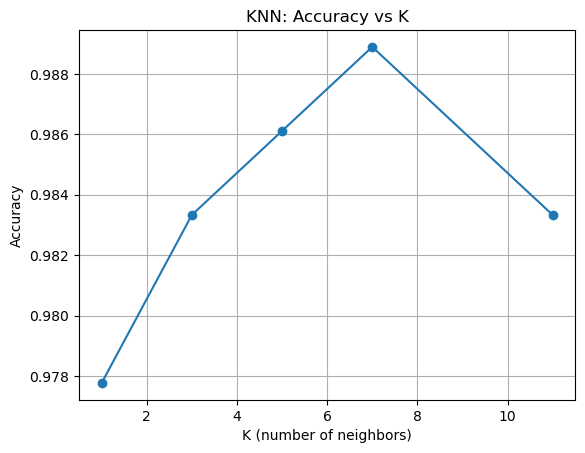

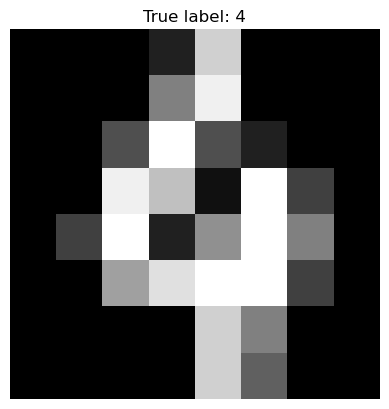

Predicted label for index 100: 4


In [4]:
# part3_knn_digits.py
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

if __name__ == "__main__":
    # Load data
    digits = load_digits()
    X = digits.data   # flattened images (64 features)
    y = digits.target # digit labels (0-9)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Try different K values
    k_values = [1, 3, 5, 7, 11]
    accuracies = []

    for k in k_values:
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        accuracies.append(acc)
        print(f"K = {k}, Accuracy = {acc}")

    # Plot accuracy vs K
    plt.plot(k_values, accuracies, marker="o")
    plt.xlabel("K (number of neighbors)")
    plt.ylabel("Accuracy")
    plt.title("KNN: Accuracy vs K")
    plt.grid(True)
    plt.show()

    # Visualize one digit
    index = 100
    plt.imshow(digits.images[index], cmap="gray")
    plt.title(f"True label: {digits.target[index]}")
    plt.axis("off")
    plt.show()

    # Predict this digit using best K (example: k=5)
    model_best = KNeighborsClassifier(n_neighbors=5)
    model_best.fit(X_train, y_train)
    predicted = model_best.predict([X[index]])
    print(f"Predicted label for index {index}:", predicted[0])


In [5]:
# part4_metrics_iris.py
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

if __name__ == "__main__":
    iris = load_iris()
    X = iris.data
    y = iris.target

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    model = LogisticRegression(max_iter=200)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy:", acc)

    # Confusion Matrix
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Precision, Recall, F1 for each class
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=iris.target_names))


Accuracy: 1.0

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [6]:
# part5_loan_logistic.py
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

if __name__ == "__main__":
    # Small dataset
    data = {
        "Income":        [30, 40, 25, 80, 60, 50, 90, 20, 35, 70],
        "Age":           [22, 25, 23, 45, 35, 30, 50, 21, 28, 40],
        "CreditScore":   [600, 650, 580, 750, 700, 680, 800, 560, 640, 720],
        "ExistingLoans": [2,   1,   3,   0,   1,   2,   0,   3,   2,   1],
        "EmploymentYrs": [1,   2,   1,   10,  6,   4,   12,  0.5, 2,   8],
        # Target: 1 = will repay, 0 = default
        "WillRepay":     [0,   1,   0,   1,   1,   1,   1,   0,   1,   1]
    }
    df = pd.DataFrame(data)

    X = df[["Income", "Age", "CreditScore", "ExistingLoans", "EmploymentYrs"]]
    y = df["WillRepay"]

    model = LogisticRegression()
    model.fit(X, y)

    accuracy = model.score(X, y)
    print("Training Accuracy:", accuracy)

    # Which feature has strongest impact? -> Look at coefficients
    feature_names = X.columns
    coeffs = model.coef_[0]

    print("\nFeature impact (coefficient values):")
    for name, c in zip(feature_names, coeffs):
        print(f"{name}: {c}")


Training Accuracy: 1.0

Feature impact (coefficient values):
Income: 0.03275779729635318
Age: 0.03502691459862101
CreditScore: 0.24760053373602983
ExistingLoans: -0.000462624516534354
EmploymentYrs: 0.0060781473695800635


In [7]:
# part5_disease_knn.py
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

if __name__ == "__main__":
    # Fake dataset: [SugarLevel, HeartRate, Age, BMI]
    X = np.array([
        [150, 80, 45, 28],
        [90,  72, 30, 22],
        [200, 88, 50, 30],
        [110, 75, 35, 24],
        [180, 92, 55, 32],
        [95,  70, 28, 21],
        [210, 95, 60, 34],
        [100, 73, 33, 23],
    ])
    # 1 = disease, 0 = no disease
    y = np.array([1, 0, 1, 0, 1, 0, 1, 0])

    for k in [3, 5, 7]:
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(X, y)
        y_pred = model.predict(X)
        acc = accuracy_score(y, y_pred)
        print(f"K = {k}, Accuracy = {acc}")


K = 3, Accuracy = 1.0
K = 5, Accuracy = 1.0
K = 7, Accuracy = 0.875


In [8]:
# part5_product_buy_logistic.py
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

if __name__ == "__main__":
    # Features: [OnlineVisits, TimeOnPage, Clicks, CartInteractions]
    X = np.array([
        [1,  10, 1, 0],
        [2,  20, 2, 1],
        [3,  25, 3, 1],
        [5,  40, 5, 2],
        [7,  50, 8, 3],
        [8,  60, 10,4],
        [2,  15, 2, 0],
        [4,  30, 4, 1],
        [6,  45, 6, 2],
        [9,  70, 12,5],
    ])
    # Target: 1 = bought, 0 = did not buy
    y = np.array([0, 0, 0, 1, 1, 1, 0, 1, 1, 1])

    model = LogisticRegression()
    model.fit(X, y)

    y_pred = model.predict(X)
    print("Confusion Matrix:")
    print(confusion_matrix(y, y_pred))

    print("\nClassification Report:")
    print(classification_report(y, y_pred))


Confusion Matrix:
[[4 0]
 [0 6]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [9]:
# part6_logistic_scratch.py
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

if __name__ == "__main__":
    # Toy data: hours studied -> pass (1) / fail (0)
    X = np.array([[1], [2], [3], [4], [5], [6], [7], [8]])  # shape (8,1)
    y = np.array([[0], [0], [0], [0], [1], [1], [1], [1]])  # shape (8,1)

    m, n = X.shape
    w = np.zeros((n, 1))  # weights
    b = 0.0               # bias
    lr = 0.1              # learning rate
    epochs = 1000

    for i in range(epochs):
        z = X.dot(w) + b          # linear part
        y_hat = sigmoid(z)        # predictions
        # cost (optional): cross-entropy
        cost = - (1/m) * np.sum(y * np.log(y_hat + 1e-9) + (1 - y) * np.log(1 - y_hat + 1e-9))

        # gradients
        dw = (1/m) * X.T.dot(y_hat - y)
        db = (1/m) * np.sum(y_hat - y)

        # update
        w -= lr * dw
        b -= lr * db

        if (i+1) % 200 == 0:
            print(f"Epoch {i+1}, Cost = {cost}")

    # Test prediction
    test_hours = np.array([[3.5]])
    prob_pass = sigmoid(test_hours.dot(w) + b)[0][0]
    pred_class = 1 if prob_pass > 0.5 else 0
    print("\nTest Hours:", test_hours[0][0])
    print("Predicted Probability of Pass:", prob_pass)
    print("Predicted Class:", pred_class)


Epoch 200, Cost = 0.3150483227946894
Epoch 400, Cost = 0.23091263832811432
Epoch 600, Cost = 0.19135168625407456
Epoch 800, Cost = 0.1675771670924563
Epoch 1000, Cost = 0.15130568916076909

Test Hours: 3.5
Predicted Probability of Pass: 0.2595705366574271
Predicted Class: 0


In [10]:
# part6_knn_scratch.py
import numpy as np
from collections import Counter

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def knn_predict(X_train, y_train, x_new, k=3):
    distances = []
    for i, x_train in enumerate(X_train):
        d = euclidean_distance(x_train, x_new)
        distances.append((d, y_train[i]))

    # Sort by distance, pick k nearest
    distances.sort(key=lambda x: x[0])
    k_neighbors = distances[:k]

    # Majority vote
    labels = [label for _, label in k_neighbors]
    most_common = Counter(labels).most_common(1)[0][0]
    return most_common

if __name__ == "__main__":
    # Tiny example: points in 2D space
    X_train = np.array([
        [1, 2],
        [2, 3],
        [3, 3],
        [6, 5],
        [7, 7],
        [8, 6]
    ])
    # 0 = class A, 1 = class B
    y_train = np.array([0, 0, 0, 1, 1, 1])

    x_new = np.array([4, 4])
    pred = knn_predict(X_train, y_train, x_new, k=3)
    print("New point:", x_new)
    print("Predicted class:", pred)


New point: [4 4]
Predicted class: 0


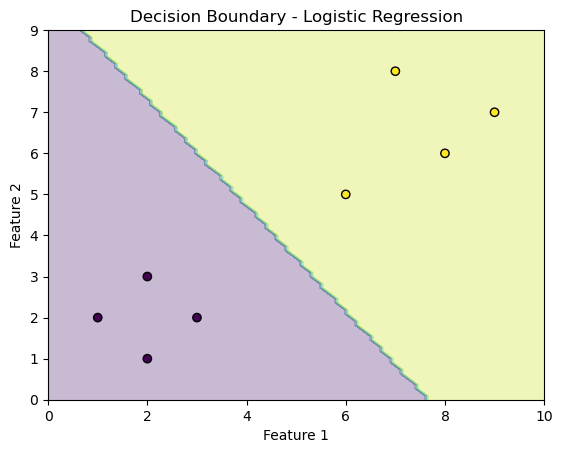

In [11]:
# part6_decision_boundary_logistic.py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

if __name__ == "__main__":
    # Simple 2D dataset
    X = np.array([
        [1, 2],
        [2, 1],
        [2, 3],
        [3, 2],
        [6, 5],
        [7, 8],
        [8, 6],
        [9, 7]
    ])
    y = np.array([0, 0, 0, 0, 1, 1, 1, 1])

    model = LogisticRegression()
    model.fit(X, y)

    # Create grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 100),
        np.linspace(y_min, y_max, 100)
    )
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid).reshape(xx.shape)

    # Plot decision regions
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundary - Logistic Regression")
    plt.show()


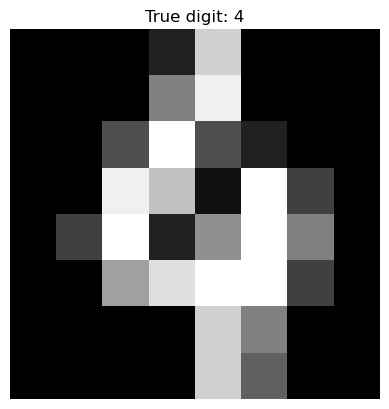

True digit: 4
Predicted digit: 4


In [12]:
# part7_knn_handwriting_core.py
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

if __name__ == "__main__":
    digits = load_digits()
    X = digits.data
    y = digits.target

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X_train, y_train)

    # Pick one image
    index = 100
    plt.imshow(digits.images[index], cmap="gray")
    plt.title(f"True digit: {digits.target[index]}")
    plt.axis("off")
    plt.show()

    # Predict digit
    pred = model.predict([X[index]])[0]
    print("True digit:", digits.target[index])
    print("Predicted digit:", pred)
